In [1]:
from cmb_simulation import *

In [2]:
powers = getCambSpectra(lmax=9000)

# Spectrum sampling

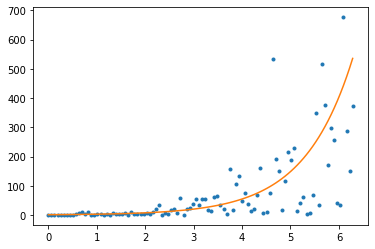

In [8]:
# Spctrum.sample
spec = Spectrum(np.exp)
ls = np.linspace(0, 2*np.pi, 100)
samples = spec.sample(ls)

plt.plot(ls, (samples*samples.conj()).real, '.')
plt.plot(ls, spec(ls))
plt.show()
# validate: dots scatter around orange line

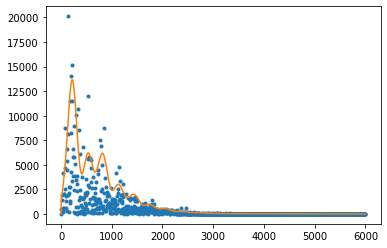

In [21]:
# sampleCov, CMBSpectra.choleskyUnlensed
specs = CMBSpectra(powers)
ls = np.linspace(0, 6000, 1000)
chol = specs.choleskyUnlensed(ls)
samples = sampleCov(chol)

plt.plot(ls, (samples[:,0]*samples[:,0].conj()).real * ls**2 / (2*np.pi), '.')
specs.TT.plot(ls, scale=lambda l: l**2 / np.sqrt(2*np.pi))
plt.show()
# validate: dots scatter around orange line

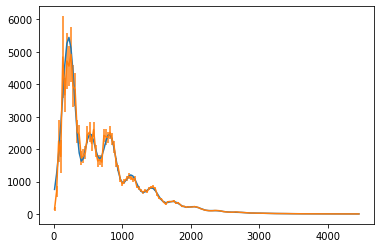

In [22]:
# CMBSpectra.generatePrimordialMaps, Averager.bin
specs = CMBSpectra(powers)
TEB_prim, p_prim = specs.generatePrimordialMaps(0.001, 256)

binned_T = TEB_prim.T.binSpectrum(delta=30)
specs.TT.plot(binned_T.ls, scale=lambda l: l**2/(2*np.pi))
binned_T.plot(scale=lambda l: l**2/(2*np.pi))
plt.show()
# validate: points match curve

In [23]:
# T anisotropy
specs = CMBSpectra(powers)
TEB_prim, p_prim = specs.generatePrimordialMaps(0.001, 256)
np.sqrt(np.mean(TEB_prim.T.r**2))
# validate: ~100 (muK)

96.78266989324402

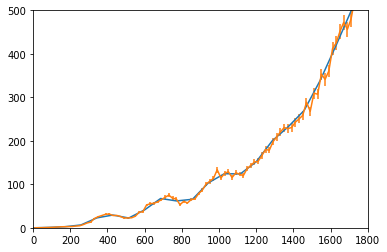

In [26]:
# Detector.addNoise
specs = CMBSpectra(powers)
TEB_prim, p = specs.generatePrimordialMaps(0.001, 512)
planck = Detector(*planck_params)
TEB_prim_obs = planck.addNoise(TEB_prim)

(specs.EE+planck.EEn).plot(np.linspace(0, 4200), scale=lambda l: l**2/(2*np.pi), logaxis=None)
TEB_prim_obs.E.binSpectrum().plot(scale=lambda l: l**2/(2*np.pi))
plt.xlim(0, 1800)
plt.ylim(0, 500)
plt.show()
# validate: points match curve (noisy map indeed has spectrum C_XY + C_XY_n)

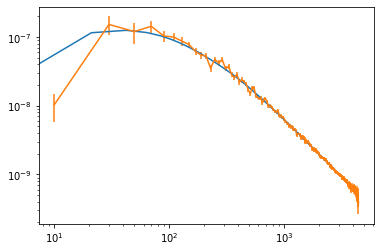

In [30]:
# pp sampling
specs.pp.plot(np.linspace(0, 4200, 200), scale=lambda l: l**4/(2*np.pi), logaxis='both')
p.binSpectrum().plot(scale=lambda l: l**4/(2*np.pi))

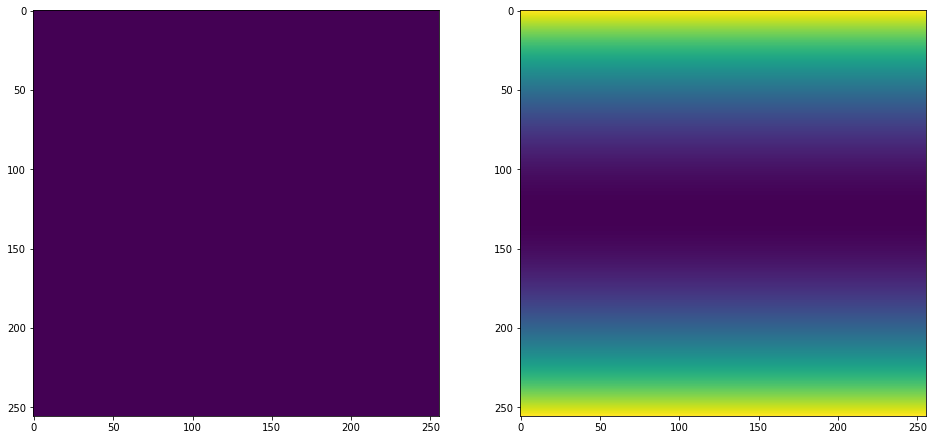

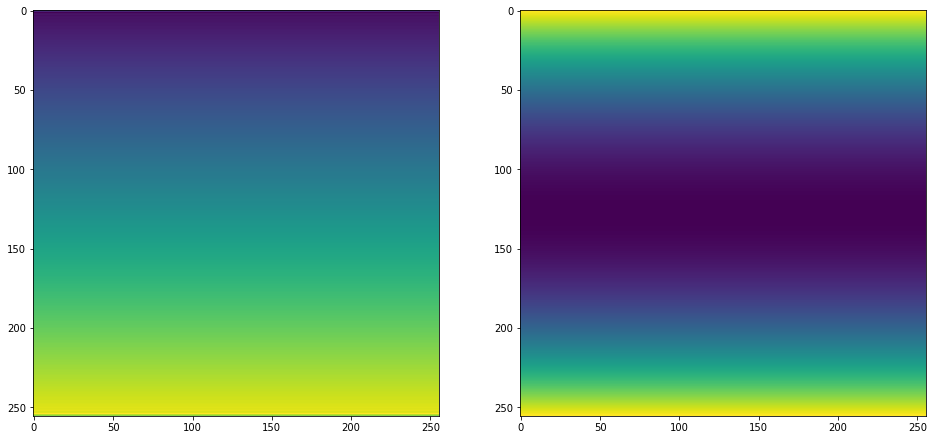

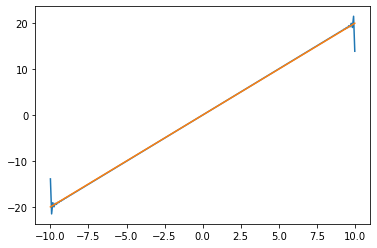

In [17]:
# grad
vals = np.linspace(-10, 10, 256)
p_r = np.array([[y**2 for x in vals] for y in vals])
p = CMBMap(20/256, 256, real=p_r)
px, py = grad(p)

plot2Maps(px.r, p.r)
plot2Maps(py.r, p.r)
plt.plot(vals, py.r[:,150])
plt.plot(vals, [2*y for y in vals])
# x changes horizontally (no change), y changes vertically (linearly)

In [19]:
specs = CMBSpectra(powers)
TEB_prim, p = specs.generatePrimordialMaps(0.001, 512)
px, py = grad(p)
np.sqrt(np.mean(px.r**2+py.r**2)) *60*180/np.pi
# validate: around 2 (arcmin)

1.9406013097270214

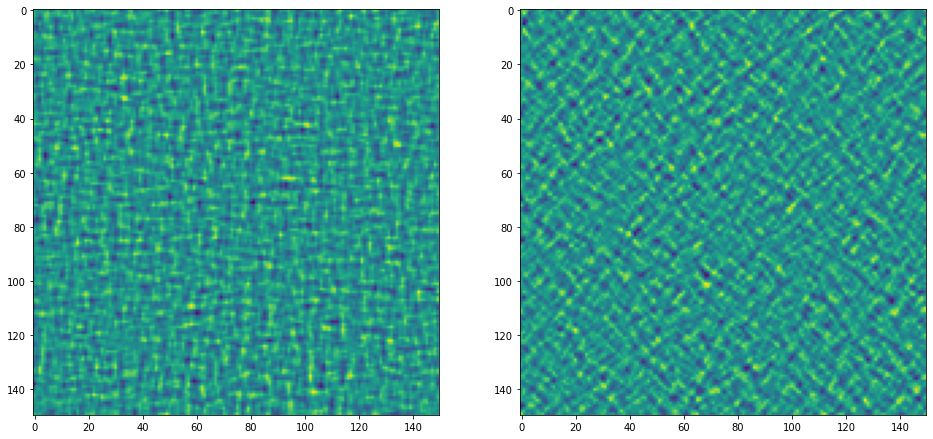

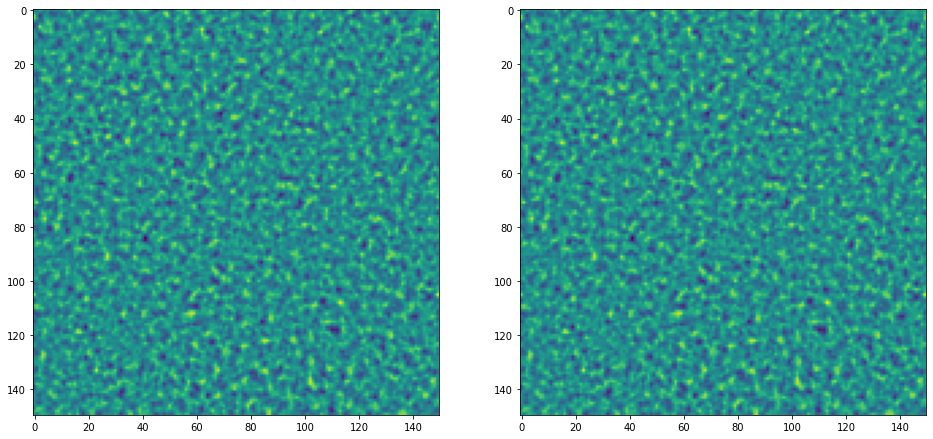

In [10]:
specs = CMBSpectra(powers)
TEB_prim, p = specs.generatePrimordialMaps(0.4, 150)
tqu = TEB_prim.getTQU()
teb = tqu.getTEB()

plot2Maps(tqu.Q.r, tqu.U.r)
plot2Maps(TEB_prim.E.r, teb.E.r)

In [3]:
specs = CMBSpectra(powers)
TEB_prim, p = specs.generatePrimordialMaps(0.001, 800)
TEB_len = lensTEB(TEB_prim, CMBMap(p.d, p.N, real=p.r))

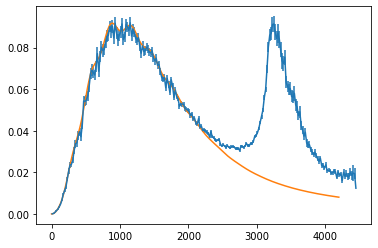

In [25]:
TEB_len.B.binSpectrum().plot(scale=lambda l: l**2/(2*np.pi))
specs.BB_len.plot(np.linspace(0, 4200, 200), scale=lambda l: l**2/(2*np.pi))

In [22]:
cmb_s4 = Detector(*cmb_s4_params)
TEB_len_obs = cmb_s4.addNoise(TEB_len)

In [26]:
np.save('T.npy', TEB_len_obs.T.r)
np.save('E.npy', TEB_len_obs.E.r)
np.save('B.npy', TEB_len_obs.B.r)